<a href="https://colab.research.google.com/github/SumanMishra0406/google_stock/blob/main/Google_Stock_Price_Deep_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential

test = pd.read_csv("Google_Stock_Test (2023).csv")
train = pd.read_csv("Google_Stock_Train (2010-2022).csv")

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       143 non-null    object 
 1   Open       143 non-null    float64
 2   High       143 non-null    float64
 3   Low        143 non-null    float64
 4   Close      143 non-null    float64
 5   Adj Close  143 non-null    float64
 6   Volume     143 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426113,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931249,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [ ]:
test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02
mean,107.461259,109.036644,106.351678,107.782168,107.782168,3.669292e+07
std,12.704584,12.799080,12.610591,12.620808,12.620808,1.415642e+07
min,85.980003,87.570000,84.860001,86.199997,86.199997,1.446790e+07
25%,95.509998,97.625000,94.494999,96.525002,96.525002,2.770280e+07
50%,105.470001,106.690002,104.110001,105.410004,105.410004,3.326680e+07
75%,120.690002,122.305001,119.315002,120.694999,120.694999,4.093580e+07
max,131.669998,133.740005,130.570007,132.580002,132.580002,1.194550e+08


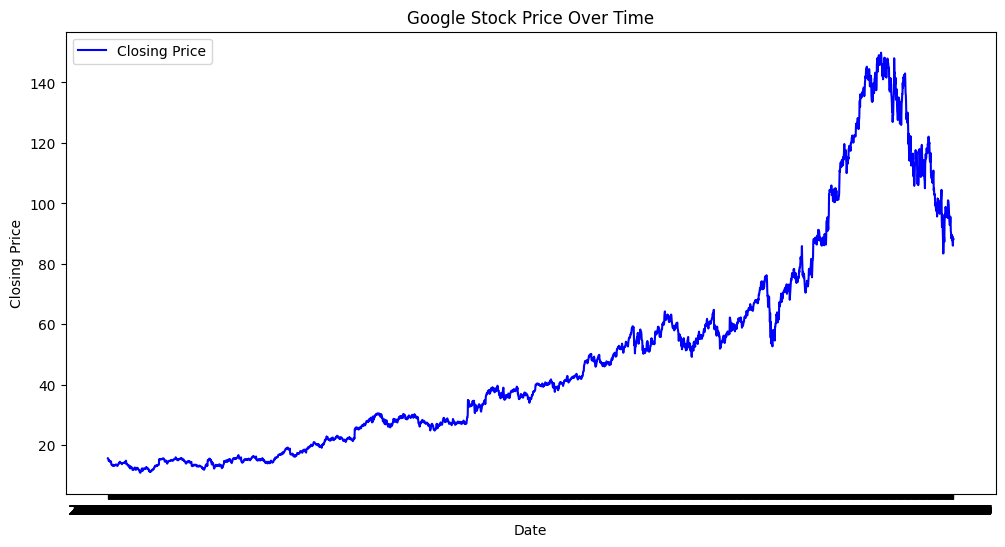

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Stock Price Over Time')
plt.legend()
plt.show()

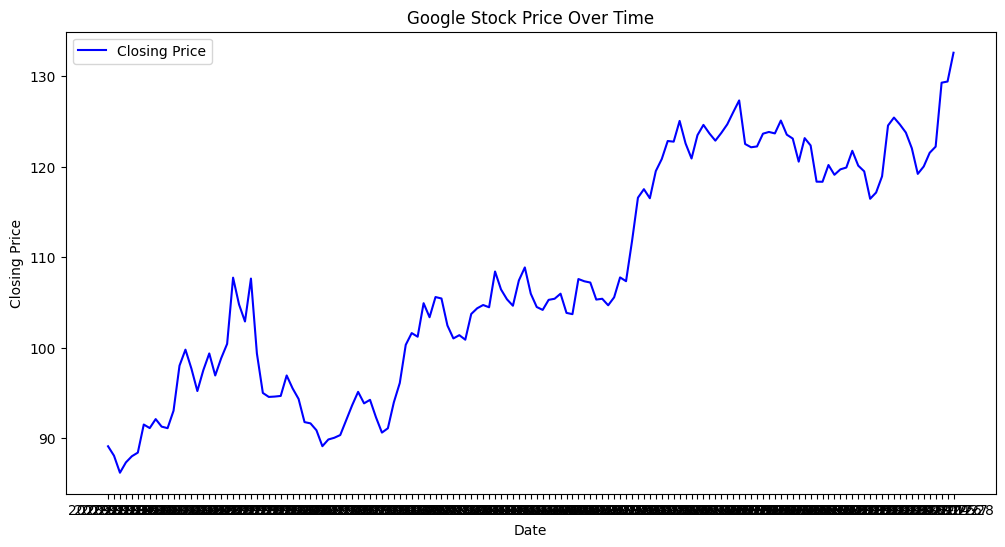

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Stock Price Over Time')
plt.legend()
plt.show()

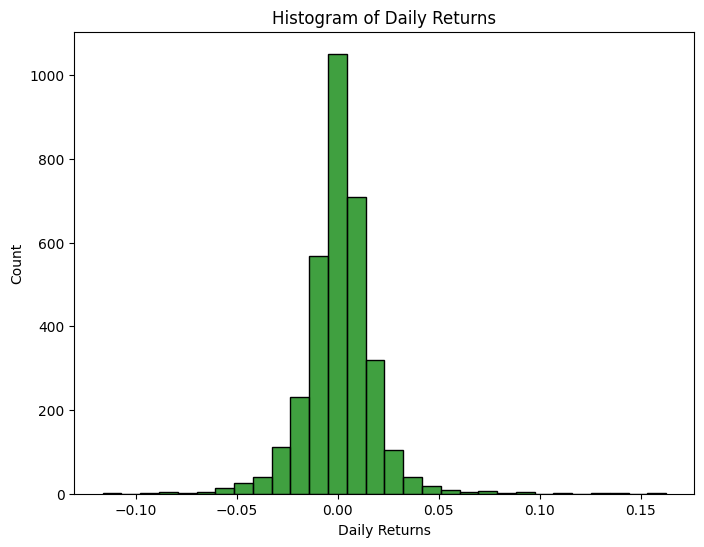

In [ ]:
returns = train['Close'].pct_change().dropna()
plt.figure(figsize=(8, 6))
sns.histplot(returns, bins=30, color='green')
plt.xlabel('Daily Returns')
plt.title('Histogram of Daily Returns')
plt.show()

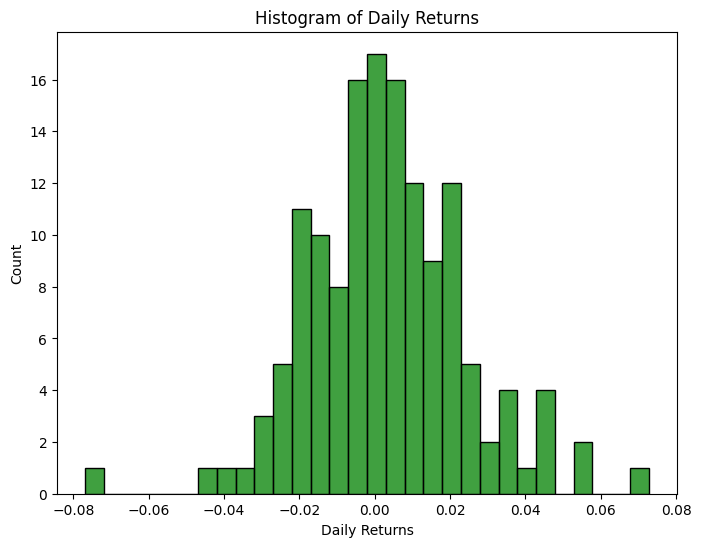

In [ ]:
returns = test['Close'].pct_change().dropna()
plt.figure(figsize=(8, 6))
sns.histplot(returns, bins=30, color='green')
plt.xlabel('Daily Returns')
plt.title('Histogram of Daily Returns')
plt.show()

<ipython-input-23-2c890a689cb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


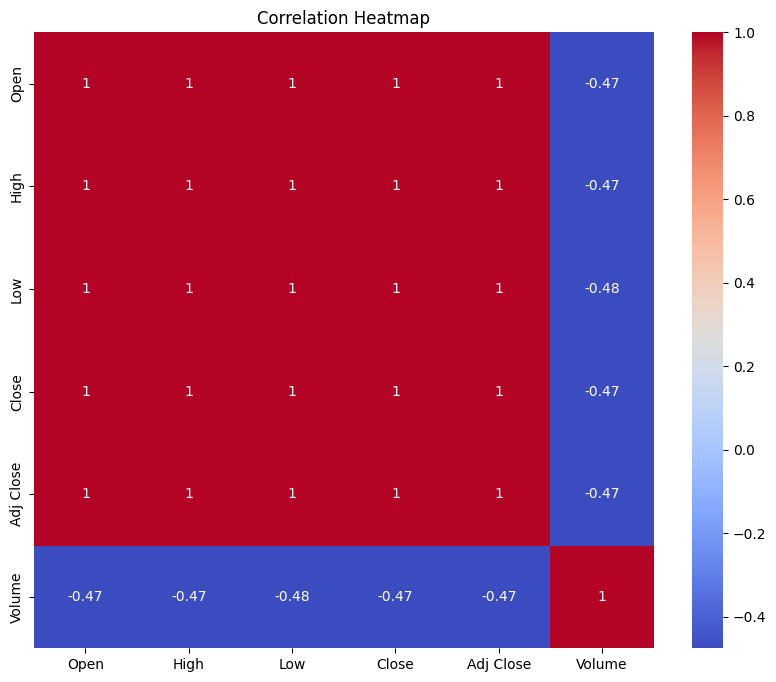

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-25-c70826210066>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = test.corr()


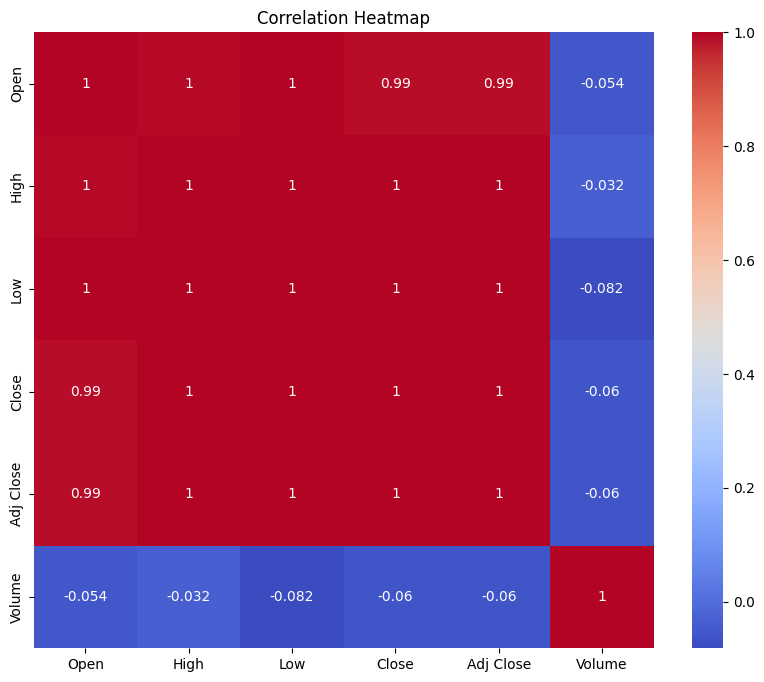

In [ ]:
corr_matrix = test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train.sort_values(by='Date', inplace=True)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [ ]:
scaler = MinMaxScaler()
# Normalize the 'Close' price using Min-Max scaling
train['Close'] = scaler.fit_transform(train[['Close']])

In [ ]:
test['Date'] = pd.to_datetime(test['Date'])
test.sort_values(by='Date', inplace=True)

In [ ]:
scaler = MinMaxScaler()
test['Close'] = scaler.fit_transform(test[['Close']])

In [ ]:
train = train.drop("Date",axis=1)
test = test.drop("Date", axis=1)
X = train.drop("Adj Close",axis=1)
Y = train["Adj Close"]
X_test  = test.drop("Adj Close",axis=1).copy()


(2290, 5) (982, 5) (2290,) (982,)


In [ ]:
from sklearn import model_selection
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(2290, 5) (982, 5) (2290,) (982,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
# first hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [ ]:
# second hidden layer
classifier.add(Dense(units=5,activation='relu'))

In [ ]:
# third hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=100,epochs=50)

Epoch 1/50
154/154 [==============================] - 10s 10ms/step - loss: 750.5830 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 2/50
154/154 [==============================] - 1s 5ms/step - loss: 750.5829 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 3/50
154/154 [==============================] - 1s 6ms/step - loss: 750.5829 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 4/50
154/154 [==============================] - 1s 7ms/step - loss: 750.5828 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 5/50
154/154 [==============================] - 2s 11ms/step - loss: 750.5832 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 6/50
154/154 [==============================] - 1s 8ms/step - loss: 750.5828 - accuracy: 0.0000e+00 - val_loss: 773.5729 - val_accuracy: 0.0000e+00
Epoch 7/50
154/154 [==============================] - 2s 10ms/step - loss

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


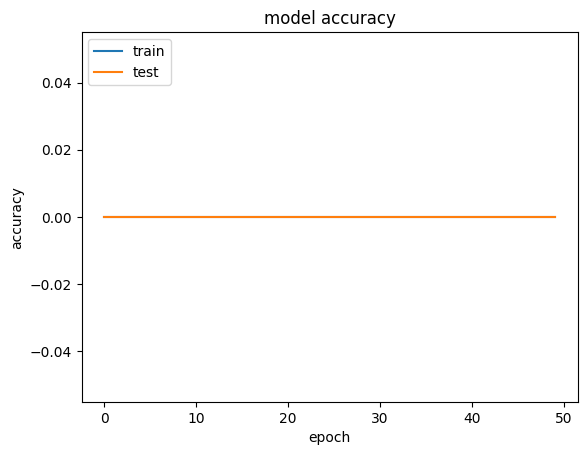

In [ ]:
# accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

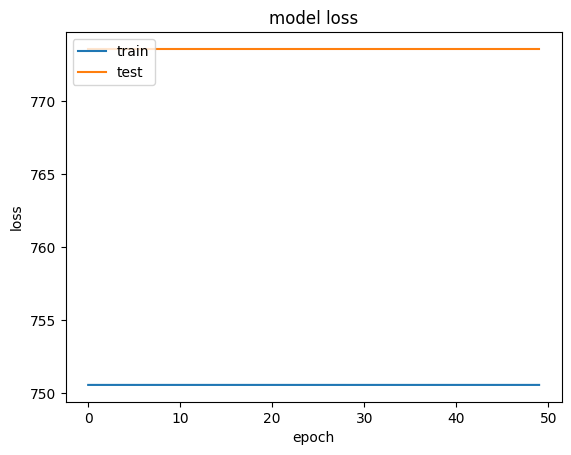

In [ ]:
# loss graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

5/5 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [1]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)